# Information driven bars
El propósito de las barras estas barras es muestrear con más frecuencia cuando llega nueva información al mercado. En este contexto, la palabra "información" se utiliza en un sentido microestructural de mercado. Como veremos en el Capítulo 19, las teorías de microestructura de mercado confieren una importancia especial a la persistencia de los volúmenes con signo desequilibrado, ya que este fenómeno está asociado con la presencia de traders informados. Al sincronizar el muestreo con la llegada de traders informados, podemos ser capaces de tomar decisiones antes de que los precios alcancen un nuevo nivel de equilibrio. En esta sección exploraremos cómo utilizar varios índices de llegada de información para muestrear barras.

Las barras de desequilibrio pueden aplicarse a datos de tick, volumen o dólares para producir barras de desequilibrio de tick (TIB), de volumen (VIB) y de dólares (DIB), respectivamente. Las barras de volumen y dólares son simplemente una extensión de las barras de tick, por lo que en este artículo nos centraremos principalmente en las barras de desequilibrio de tick y luego discutiremos brevemente cómo extenderlas para manejar información de volumen o dólares

## Tick imbalance bars

Considere una secuencia de ticks $\{(p_t, v_t)\}_{t=1,\ldots,T}$, donde $(p_t)$ es el precio asociado con el tick $t$ y $v_t$ es el volumen asociado con el tick $t$. La llamada regla del tick define una secuencia ${b_t}_{t=1,\ldots,T}$ donde

$$
b_t = 
\begin{cases} 
b_{t-1} & \text{si } \Delta p_t = 0, \\
\frac{|\Delta p_t|}{\Delta p_t} & \text{si } \Delta p_t \neq 0, 
\end{cases}
$$

con $b_t \in \{-1, 1\}$, y la condición de límite $b_0$ se establece para coincidir con el valor terminal $b_T$ de la barra inmediatamente anterior. La idea detrás de las barras de desequilibrio de tick (TIBs) es muestrear barras siempre que los desequilibrios de tick superen nuestras expectativas. Deseamos determinar el índice de tick, $T$, tal que la acumulación de ticks firmados (según la regla del tick) exceda un umbral dado. A continuación, discutiremos el procedimiento para determinar $T$.

Primero, definimos el desequilibrio de tick en el tiempo \(T\) como

$$ \theta_T = \sum_{t=1}^{T} b_t$$

Segundo, calculamos el valor esperado de $\theta_T$ al inicio de la barra, $E_0[\theta_T] = E_0[T](P[b_t = 1] - P[b_t = -1])$, donde $E_0[T]$ es el tamaño esperado de la barra de tick, $P[b_t = 1]$ es la probabilidad incondicional de que un tick se clasifique como compra, y $P[b_t = -1]$ es la probabilidad incondicional de que un tick se clasifique como venta. Dado que $P[b_t = 1] + P[b_t = -1] = 1$, entonces $E_0[\theta_T] = E_0[T](2P[b_t = 1] - 1)$.

En la práctica, podemos estimar $E_0[T]$ como un promedio móvil ponderado exponencialmente de valores $T$ de barras anteriores, y $2P[b_t = 1] - 1$ como un promedio móvil ponderado exponencialmente de valores $b_t$ de barras anteriores.

Tercero, definimos una barra de desequilibrio de tick (TIB) como un subconjunto contiguo de $T^*$ ticks tal que se cumpla la siguiente condición:

$$
T^* = \arg \min_T \left\{ \abs{\theta_T} \leq \right\}
$$
{E_0[\theta_T]} 2P[b_t = 1] - 1}{E_0[T]}} 

recursos: https://github.com/cltai9145/research/blob/master/Chapter2/2019-04-11_OP_Dollar-Imbalance-Bars.ipynb
https://towardsdatascience.com/financial-machine-learning-part-0-bars-745897d4e4ba
https://medium.com/@quant_views/imbalance-bars-a860a97838b2
https://quant.stackexchange.com/questions/44476/tick-imbalance-bars-advances-in-financial-machine-learning

https://github.com/cltai9145/research/blob/master/Chapter2/Getting%20Started.ipynb
https://github.com/cltai9145/research/blob/master/Chapter2/2019-04-11_OP_Dollar-Imbalance-Bars.ipynb

https://github.com/cltai9145/research/blob/master/Chapter2/mlfinlab/data_structures/fast_ewma.py
https://github.com/cltai9145/research/blob/master/Chapter2/2019-03-03_JJ_Sample-Techniques.ipynb

https://towardsdatascience.com/information-driven-bars-for-finance-c2b1992da04d
https://towardsdatascience.com/information-driven-bars-for-financial-machine-learning-imbalance-bars-dda9233058f0

https://www.sefidian.com/2021/06/12/introduction-to-advanced-candlesticks-in-finance-tick-bars-dollar-bars-volume-bars-and-imbalance-bars/
https://github.com/quant-views/Imbalance-bars/blob/main/Imbalance-Bars-FINAL.py

https://github.com/Harkishan-99/Alternative-Bars/blob/master/bars.py


11

Question 1. Actually, the assumption of trade data format is that you have timestamp, size and price (not bid/ask) of trade. Sometimes, trades(ticks) are included to Level 1 data (also called BBO) which assumes bid and ask information. However, bars are constructed on trades, not quotes.

Question 2. Yes, T value is derived from equation 3. The process is described in details below.

The whole process of imbalance bars calculation is not straightforward. First of all, you have to set 3 parameters:

Initial guess for expected number of ticks in imbalance bars (𝐸0[𝑇]). When you start to calculate imbalance bars, you don't have any bars at all, so you don't have any information about expected number of ticks inside of an imbalance bar. That is why you need an initial guess. This parameter doesn't significantly impact further imbalance bars, but still it is needed for the first bar calculation

Number of bars to use for expected number of ticks in bars. When you accumulate imbalance bars you can define 𝐸0[𝑇] as EWMA of number of ticks in previous bars that is why you need to set the window for EWMA calculation.

Number of ticks to use for expected imbalance calculation. Expected tick imbalance (2𝑃[𝑏𝑡=1]−1) can be found by calculating EWMA from tick imbalances from previous trades/ticks. We need to set the window for EWMA.

The whole algorithm description:

Set parameters
On each trade calculate cumulative sum of tick imbalances (𝜃𝑇)
Start accumulating ticks until number of tick imbalances reaches the window used to expected tick imbalance calculation.
When number of tick imbalance reaches the EWMA window size - calculate expected tick imbalance (2𝑃[𝑏𝑡=1]−1)
Check if |𝜃𝑇| ≥ 𝐸0[𝑇] * |(2𝑃[𝑏𝑡=1]−1)| (absolute values on left and right)

If True - it means that we have the first bar. Set 𝜃𝑇 to zero, set expected number of ticks(𝐸0[𝑇]) to EWMA of array of number of ticks in previous bars. As we have only one bar available you call EWMA with you window setting on array of generated bars, don't worry you can call EWMA with window = 3 to an array with less than 3 elements.

If False continue, until |𝜃𝑇|≥𝐸0[𝑇]|2𝑃[𝑏𝑡=1]−1|
I am contributor to https://github.com/hudson-and-thames/mlfinlab package where you can see the implementation of imbalance bars (dollar, tick, volume) described above
Question 1: Only tick data works for this method of bar generation, which means you actually need to provide the successful transactions. Bid and ask won't work.

Question 2: T value is generated at each bar and its value will depend on the time it takes to meet the condition in equation (3) given the tick data.

Question 3:* E[T] is calculated using the EWMA of b and the EWMA of T from prior bars. The following code should clarify this procedure:

Keep in mind that at the start you need a guess for the EWMA of b and T, and you need to provide a parameter alpha to compute both of those EWMA.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sys
sys.path.append(r'C:\Users\adelapuente\Desktop\rf_tfm')


In [47]:
data = pd.read_parquet(r'C:\Users\adelapuente\Desktop\rf_tfm\notebooks\Historical_Intraday_AAPL_1min_2000-01-01_to_2017-05-31.parquet')
# Seleccionar las últimas 10 filas

data = data.tail(1000000)

In [48]:
data = data.reset_index()

In [49]:
data.head()

,date,open,high,low,close,volume
0,2011-03-10 08:58:00,10.546,10.557,10.520,10.537,28644
1,2011-03-10 08:59:00,10.544,10.554,10.521,10.539,20384
2,2011-03-10 09:00:00,10.544,10.554,10.521,10.539,14000
3,2011-03-10 09:01:00,10.541,10.553,10.520,10.536,138964
4,2011-03-10 09:02:00,10.540,10.551,10.518,10.534,171052


In [50]:
data.tail()

,date,open,high,low,close,volume
999995,2017-05-31 19:43:00,35.818,35.833,35.785,35.813,400
999996,2017-05-31 19:53:00,35.818,35.833,35.785,35.813,400
999997,2017-05-31 19:56:00,35.818,35.833,35.785,35.813,400
999998,2017-05-31 19:57:00,35.818,35.833,35.785,35.813,10784
999999,2017-05-31 20:14:00,35.797,35.812,35.764,35.792,262924


In [27]:
import pandas as pd
import numpy as np
from typing import List, Tuple

class ImbalanceBarGenerator:
    def __init__(self, dataframe: pd.DataFrame, ewma_window: int, T_init: int = 10):
        """
        Initialize the Imbalance Bar Generator with dynamic threshold adjustment.
        
        Args:
            dataframe (pd.DataFrame): DataFrame containing the columns 'date', 'open', 'close', 'high', 'low', 'volume'.
            ewma_window (int): The window size for the Exponentially Weighted Moving Average (EWMA) of the imbalance.
            T_init (int): Initial value for T before any bars are created.
            imbalance_init (float): Initial value for imbalance before any bars are created.
            constant_threshold (bool): 
        """
        self.dataframe = dataframe.copy()
        self.ewma_window = ewma_window
        self.ewma_T = T_init  # EWMA for E_0[T] initialized with T_init
        #self.ewma_imbalance = imbalance_init  # EWMA for 2v_+ - E_0[v_t] initialized with imbalance_init
        self.alpha_T = 2 / (ewma_window + 1)  # Smoothing factor for EWMA
        self.bars = []
        self.cumulative_imbalance = 0.0
        self.imbalance_type = None  # To be set in fit method
        self._apply_tick_rule()

        self.cum_imbalance_series = []
        self.expected_imabalance_series = []
        self.expected_imbalance_per_bar = []


    def _apply_tick_rule(self):
        """Apply the tick rule to calculate the signed ticks."""
        self.dataframe['delta_p'] = self.dataframe['close'] - self.dataframe['close'].shift(1)  # Calcular Δp_t como close_t - close_{t-1}

        # Asignar valores iniciales basados en delta_p
        self.dataframe['bt'] = self.dataframe['delta_p'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
        # Asegurar que el primer valor sea 1
        self.dataframe.loc[0, 'bt'] = 1
        # Llenar valores donde delta_p == 0 con el valor anterior de bt
        self.dataframe['bt'] = self.dataframe['bt'].ffill().replace(0, 1)
        # Eliminar la columna delta_p
        self.dataframe.drop(columns=['delta_p'], inplace=True)

    def _reset_bar(self, first_bar:bool = False):
        """Reset values for the next bar."""

        self.expected_imbalance = self.ewma_T * abs(self.ewma_imbalance)
        self._clip_threshold(start_at = 5)
        self.expected_imbalance_per_bar.append(self.expected_imbalance)

        
        print('EXPECTED IMABALANCE', self.expected_imbalance)
        self.cumulative_imbalance = 0.0
        self.current_high = -float('inf')
        self.current_low = float('inf')
        self.open_price = None
        self.T = 0  

    def _clip_threshold(self, sigmas:int = 2, start_at:int = 0):

        if len(self.expected_imbalance_per_bar) > start_at:
            print('clipeando')
            
            tick_median = np.mean(self.expected_imabalance_series)
            tick_std = np.std(self.expected_imabalance_series)
            
            if abs(self.ewma_T - tick_median) > sigmas * tick_std:
                self.expected_imbalance = np.random.uniform(tick_median - sigmas * tick_std, tick_median + sigmas * tick_std)
                print('thereshold clipped', self.expected_imbalance)
    
    def _update_ewma_T(self, value: float, ewma: float) -> float:
        """Update EWMA value dynamically."""
        return (self.alpha_T* value) + ((1 - self.alpha_T) * ewma)

    def fit(self, imbalance_type: str = "volume"):
        """
        Fit the Imbalance Bar Generator to the data and calculate the imbalance bars.
        
        Args:
            imbalance_type (str): The type of imbalance to calculate, either "volume" or "dollar".
        """
        if imbalance_type not in ["volume", "dollar"]:
            raise ValueError("Imbalance type must be either 'volume' or 'dollar'")

        self.imbalance_type = imbalance_type
        vt_column = 'volume' if imbalance_type == 'volume' else 'dollar'
        if imbalance_type == 'dollar':
            self.dataframe['dollar'] = self.dataframe['close'] * self.dataframe['volume']

        self.dataframe['imbalance'] = self.dataframe['bt'] * self.dataframe[vt_column]
        self.dataframe['imbalance_ewma'] = self.dataframe['imbalance'].ewm(span = self.ewma_window).mean()
        self.ewma_imbalance = self.dataframe['imbalance_ewma'][0]
     
        self._reset_bar(first_bar=True)
        for _, row in self.dataframe.iterrows():

            self.T += 1

            self.ewma_imbalance = row['imbalance_ewma']
            self.cumulative_imbalance += row['imbalance']
            
            self.cum_imbalance_series.append(self.cumulative_imbalance)
            self.expected_imabalance_series.append(self.expected_imbalance)
            
            if self.open_price is None:
                self.open_price = row['open']

            self.current_high = max(self.current_high, row['high'])
            self.current_low = min(self.current_low, row['low'])
            self.close_price = row['close']

            if abs(self.cumulative_imbalance) >= self.expected_imbalance:
                              
                self.bars.append((row['date'], self.open_price, self.current_high, self.current_low, self.close_price))
 
                # Actualizar EWMA para E_0[T] y 2v_+ - E_0[v_t] con los valores de la barra recién formada
                print('T',self.ewma_T)
                print('imbalance',self.ewma_imbalance)
                self.ewma_T = self._update_ewma_T(self.T, self.ewma_T)

                # Reiniciar variables para la siguiente barra
                self._reset_bar()

        self.dataframe['cum_imbalance'] = self.cum_imbalance_series
        self.dataframe['expected_imbalance'] = self.expected_imabalance_series

    def get_bars(self) -> pd.DataFrame:
        """
        Get the DataFrame of generated bars.
        
        Returns:
            pd.DataFrame: DataFrame of bars with columns (date, open, high, low, close).
        """
        bars_df = pd.DataFrame(self.bars, columns=['date', 'open', 'high', 'low', 'close'])
        return bars_df

    def get_series(self, variable) -> List[float]:

        return self.dataframe[variable]


In [68]:
T_init = 50
T_ewma_window = 100
generator = ImbalanceBarGenerator(dataframe=data, 
                                  ewma_window=T_ewma_window, 
                                  T_init=T_init)

generator._apply_tick_rule()

In [69]:
generator.fit(imbalance_type='volume')

EXPECTED IMABALANCE 1432200.0
T 50
imbalance -509945.0827624414
EXPECTED IMABALANCE 25325589.456796102
T 49.663366336633665
imbalance 291838.58430346806
EXPECTED IMABALANCE 14507189.88699902
T 49.70963631016567
imbalance 210983.60100847148
EXPECTED IMABALANCE 10906920.490921022
T 51.69558410600397
imbalance 348447.0944360073
EXPECTED IMABALANCE 17794478.370212507
T 51.067948777172205
imbalance 259046.9771757582
EXPECTED IMABALANCE 15424136.460419552
T 59.54185078158463
imbalance 564166.1382879354
clipeando
thereshold clipped 13572806.329557363
EXPECTED IMABALANCE 13572806.329557363
T 58.50141809284038
imbalance 352192.4991740188
clipeando
thereshold clipped 16444577.071934607
EXPECTED IMABALANCE 16444577.071934607
T 58.927132586051464
imbalance 497688.68290642515
clipeando
thereshold clipped 23920609.8067645
EXPECTED IMABALANCE 23920609.8067645
T 58.67114976256529
imbalance 565759.0603824162
clipeando
thereshold clipped 17569684.142177828
EXPECTED IMABALANCE 17569684.142177828
T 58.222

In [9]:
np.unique(generator.dataframe.bt, return_counts=True)

(array([-1,  1], dtype=int64), array([42624, 57377], dtype=int64))

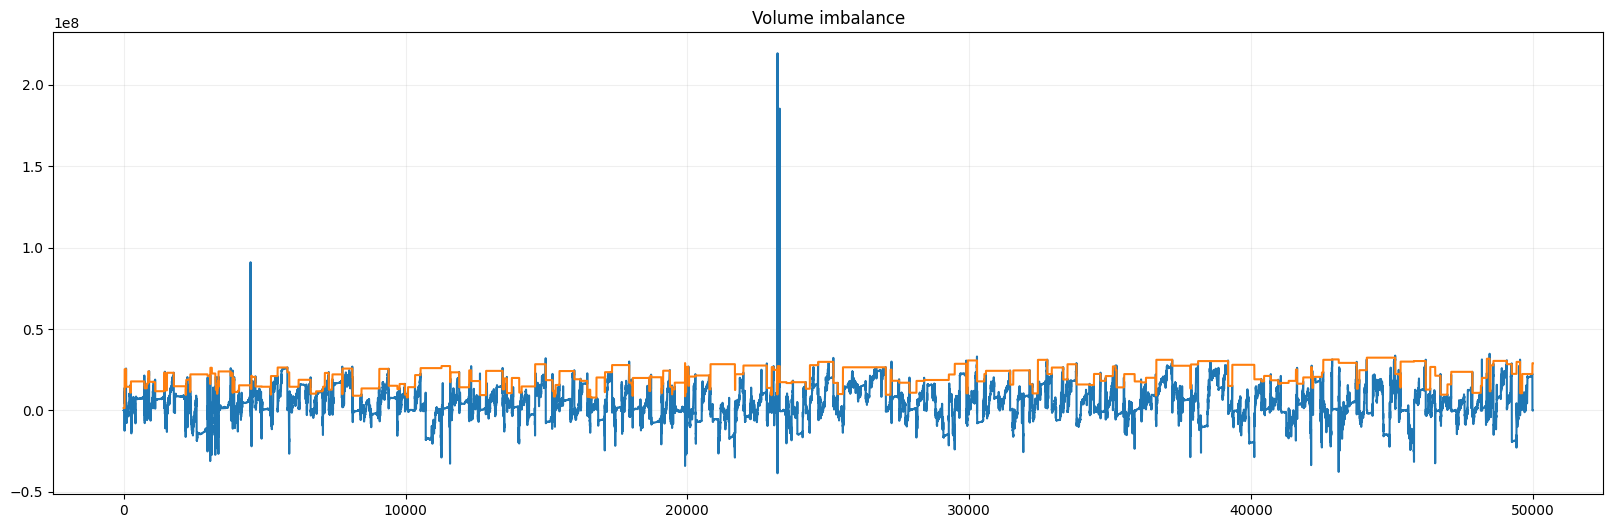

In [70]:
plt.figure(figsize=(20, 6))  # For example, 10 inches by 6 inches
plt.plot(generator.get_series('cum_imbalance')[:50000])
plt.plot(generator.get_series('expected_imbalance')[:50000])
#plt.plot(-generator.get_series('expected_imbalance')[:])
plt.grid(alpha = 0.2)
plt.title('Volume imbalance')
plt.show()

<Axes: >

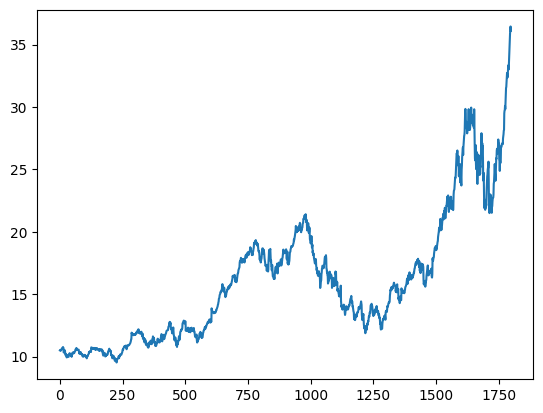

In [71]:
generator.get_bars().close.plot()

In [72]:
from scipy import stats

result = generator.get_bars()

ret = result.close.pct_change()[1:]

jb = stats.jarque_bera(ret)[0]
kurt = stats.kurtosis(ret)
skew = stats.skew(ret)
mean = ret.mean()
std = ret.std()

# Crear un DataFrame con las estadísticas
stats_data = {
    'mean': [mean],
    'std': [std],
    'skew': [skew],
    'kurtosis': [kurt],
    'jarque-bera stats': [jb]
}

df = pd.DataFrame(stats_data, index=['volume_imbalance'])
df

,mean,std,skew,kurtosis,jarque-bera stats
volume_imbalance,0.000793,0.014448,-0.809014,5.658572,2594.922315


In [83]:
ret

1      -0.001239
2       0.000668
3       0.003338
4      -0.003802
5       0.006489
          ...   
1794    0.018577
1795    0.013438
1796    0.005349
1797    0.009865
1798   -0.009384
Name: close, Length: 1798, dtype: float64

In [ ]:
# Realizar el test de Jarque-Bera
jb_stat, p_value = stats.jarque_bera(data)

print(f"JB Statistic: {jb_stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Los datos no siguen una distribución normal.")
else:
    print("No se puede rechazar la hipótesis nula: Los datos siguen una distribución normal.")

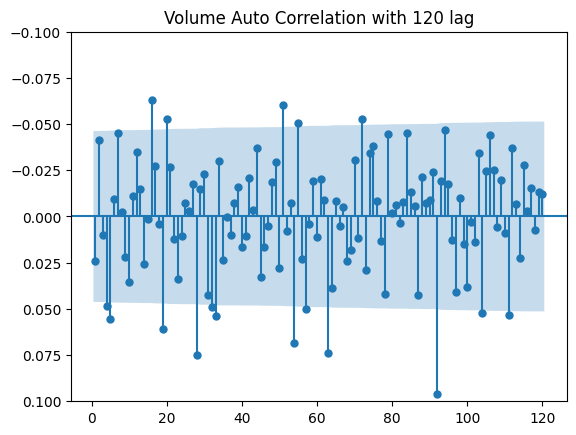

In [73]:
from statsmodels.graphics.tsaplots import plot_acf
lags = 120
max_lags = min(lags, len(ret) - 1)
bar = 'volume'
plot_acf(ret, lags=max_lags, zero=False, title=f'Volume Auto Correlation with {max_lags} lag')
plt.ylim([0.1, -0.1])
plt.show()

In [74]:
auto_corr = ret.autocorr(lag=1)
print(f'Auto-correlations for {bar} with lag=1 is {auto_corr} ')

Auto-correlations for volume with lag=1 is 0.023919821559777617 


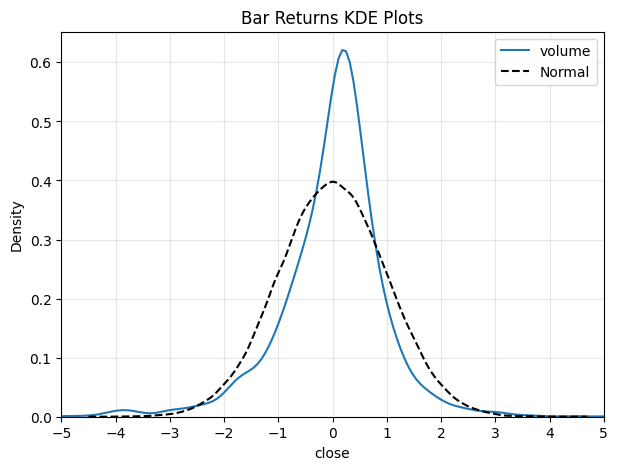

In [80]:
import seaborn as sns
f,ax=plt.subplots(figsize=(7,5))

#normalize the returns 
norm_ret = (ret - ret.mean()) / ret.std()
sns.kdeplot(norm_ret, label=bar)
sns.kdeplot(np.random.normal(size=100000), label="Normal", color='black', linestyle="--")
plt.title('Bar Returns KDE Plots')
plt.xticks(range(-5, 6))
#plt.legend(loc=8, ncol=5)
plt.legend()
plt.xlim(-5, 5)
plt.grid(alpha = 0.3)
plt.show()

In [ ]:
def getDailyVol(close,span0=100):
    # daily vol, reindexed to close
    df0=close.index.searchsorted(close.index-pd.Timedelta(days=1))
    df0=df0[df0>0]
    df0=pd.Series(close.index[df0–1], index=close.index[close.shape[0]-df0.shape[0]:])
    df0=close.loc[df0.index]/close.loc[df0.values].values-1 # daily returns
    df0=df0.ewm(span=span0).std()
    return df0